In [120]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
weather = pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')

In [123]:
weather

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [124]:
weather['Location'].nunique()

49

In [125]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [126]:
weather['Sunshine'].value_counts()

0.0     2308
10.7    1087
11.0    1078
10.8    1058
10.5    1018
        ... 
14.0      15
14.1       6
14.3       4
14.2       2
14.5       1
Name: Sunshine, Length: 145, dtype: int64

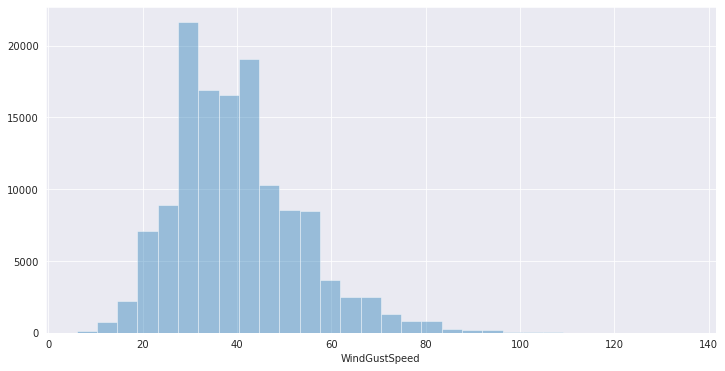

In [127]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.distplot(weather['WindGustSpeed'],kde=False,bins=30)

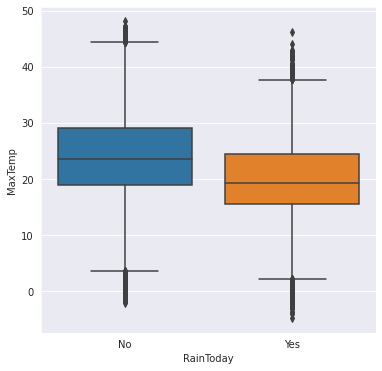

In [128]:
plt.figure(figsize=(6,6))
sns.boxplot(x='RainToday',y='MaxTemp',data=weather)

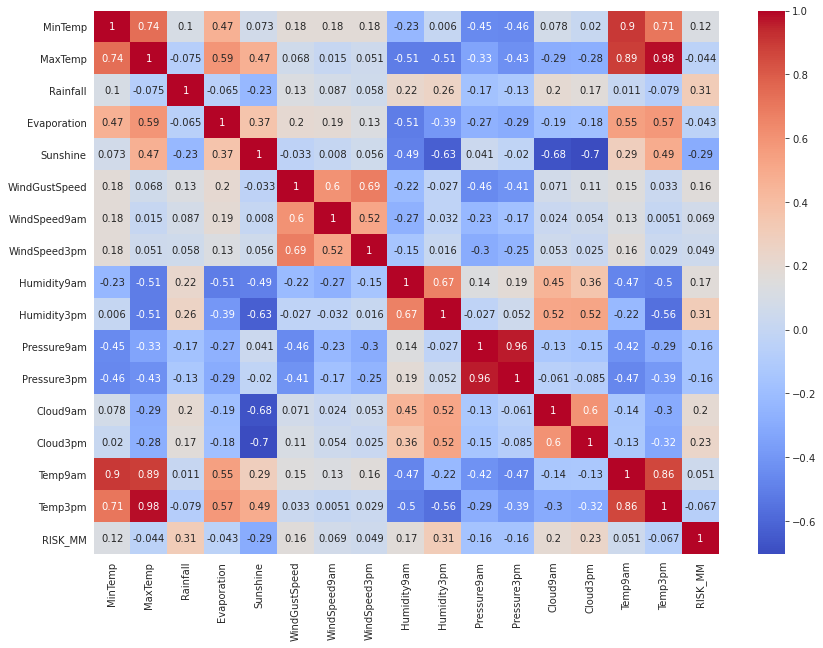

In [373]:
plt.figure(figsize=(14,10))
sns.heatmap(weather.corr(),cmap='coolwarm',cbar=True,annot=True);

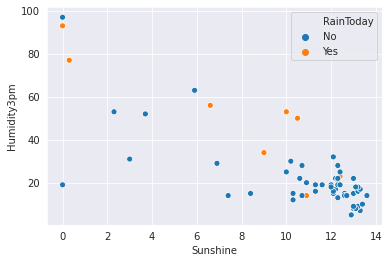

In [382]:
sns.scatterplot(x='Sunshine',y='Humidity3pm',data=weather.iloc[:7000],hue='RainToday')

In [130]:
weather.isnull().sum()/len(weather)*100

Date              0.000000
Location          0.000000
MinTemp           0.447983
MaxTemp           0.226453
Rainfall          0.988797
Evaporation      42.789026
Sunshine         47.692924
WindGustDir       6.561504
WindGustSpeed     6.519308
WindDir9am        7.041838
WindDir3pm        2.656952
WindSpeed9am      0.948007
WindSpeed3pm      1.849599
Humidity9am       1.247600
Humidity3pm       2.538803
Pressure9am       9.855619
Pressure3pm       9.832411
Cloud9am         37.735332
Cloud3pm         40.152469
Temp9am           0.635756
Temp3pm           1.917113
RainToday         0.988797
RISK_MM           0.000000
RainTomorrow      0.000000
dtype: float64

In [131]:
copy = weather
len(copy)

142193

In [132]:
weather.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [133]:
for column in weather.columns:
    copy = copy[copy[column].notna()]
    
copy

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
5939,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,0.0,No
5940,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,0.0,No
5942,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,0.0,No
5943,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,0.0,No
5944,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139108,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,0.0,No
139109,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,0.0,No
139110,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,0.0,No
139111,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,0.0,No


In [134]:
copy.isnull().sum()/len(weather)*100

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RISK_MM          0.0
RainTomorrow     0.0
dtype: float64

In [135]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 5939 to 139112
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cl

In [136]:
copy['WindGustDir'].value_counts()

E      4516
N      4210
W      4161
SW     4052
ENE    4028
SE     3930
SSW    3898
WSW    3791
S      3636
ESE    3312
SSE    3295
NE     3185
WNW    2989
NW     2612
NNE    2516
NNW    2289
Name: WindGustDir, dtype: int64

In [137]:
copy['RainToday'].value_counts()

No     43958
Yes    12462
Name: RainToday, dtype: int64

In [138]:
copy.select_dtypes(['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [139]:
copy['RainTomorrow'] = copy['RainTomorrow'].map({'No':0,'Yes':1})
copy['RainTomorrow']

5939      0
5940      0
5942      0
5943      0
5944      0
         ..
139108    0
139109    0
139110    0
139111    0
139112    0
Name: RainTomorrow, Length: 56420, dtype: int64

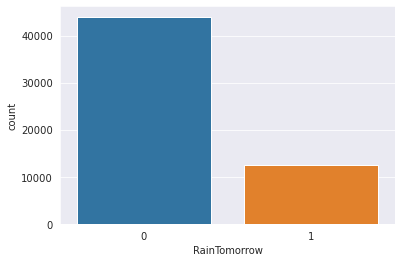

In [140]:
sns.countplot(x='RainTomorrow',data=copy)

In [141]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 5939 to 139112
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cl

In [142]:
del copy['RISK_MM']

In [143]:
copy.select_dtypes(['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday'],
      dtype='object')

In [144]:
copy.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [145]:
copy['Date']

5939      2009-01-01
5940      2009-01-02
5942      2009-01-04
5943      2009-01-05
5944      2009-01-06
             ...    
139108    2017-06-20
139109    2017-06-21
139110    2017-06-22
139111    2017-06-23
139112    2017-06-24
Name: Date, Length: 56420, dtype: object

In [146]:
type(copy['Date'][5939])

str

In [147]:
copy['Year'] = copy['Date'].apply(lambda date: int(date.split('-')[0]))
copy['Month'] = copy['Date'].apply(lambda date: int(date.split('-')[1]))
del copy['Date']
copy

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
5939,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,1006.3,1004.4,2.0,5.0,26.6,33.4,No,0,2009,1
5940,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,1012.9,1012.1,1.0,1.0,20.3,27.0,No,0,2009,1
5942,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,1012.3,1009.2,1.0,6.0,28.7,34.9,No,0,2009,1
5943,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,1012.7,1009.1,1.0,5.0,29.1,35.6,No,0,2009,1
5944,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,...,1010.7,1007.4,1.0,6.0,33.6,37.6,No,0,2009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139108,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,...,1013.9,1010.5,0.0,1.0,24.5,32.3,No,0,2017,6
139109,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,...,1014.6,1011.2,7.0,0.0,24.8,32.0,No,0,2017,6
139110,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,...,1015.3,1011.8,0.0,0.0,24.8,32.1,No,0,2017,6
139111,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,...,1014.9,1010.7,1.0,1.0,24.8,29.2,No,0,2017,6


In [148]:
copy.select_dtypes(['object']).columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object')

In [149]:
dummies = pd.get_dummies(copy[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday']],drop_first=True)
copy = copy.drop(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday'],axis=1)
copy = pd.concat([copy,dummies],axis=1)
copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 5939 to 139112
Data columns (total 90 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MinTemp                    56420 non-null  float64
 1   MaxTemp                    56420 non-null  float64
 2   Rainfall                   56420 non-null  float64
 3   Evaporation                56420 non-null  float64
 4   Sunshine                   56420 non-null  float64
 5   WindGustSpeed              56420 non-null  float64
 6   WindSpeed9am               56420 non-null  float64
 7   WindSpeed3pm               56420 non-null  float64
 8   Humidity9am                56420 non-null  float64
 9   Humidity3pm                56420 non-null  float64
 10  Pressure9am                56420 non-null  float64
 11  Pressure3pm                56420 non-null  float64
 12  Cloud9am                   56420 non-null  float64
 13  Cloud3pm                   56420 non-null 

In [203]:
from sklearn.model_selection import train_test_split

In [356]:
X = copy.drop('RainTomorrow',axis=1).values
y = copy['RainTomorrow'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [357]:
from sklearn.preprocessing import MinMaxScaler

In [358]:
scaler = MinMaxScaler()

In [359]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [360]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [367]:
model = Sequential()

model.add(Dense(88,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(88,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(44,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(11,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [368]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=10,
          batch_size=80,
          validation_data=(X_test, y_test), 
          )

Epoch 1/10
494/494 [==============================] - 1s 3ms/step - loss: 0.4176 - val_loss: 0.3576
Epoch 2/10
494/494 [==============================] - 1s 3ms/step - loss: 0.3579 - val_loss: 0.3430
Epoch 3/10
494/494 [==============================] - 1s 3ms/step - loss: 0.3436 - val_loss: 0.3356
Epoch 4/10
494/494 [==============================] - 1s 3ms/step - loss: 0.3339 - val_loss: 0.3316
Epoch 5/10
494/494 [==============================] - 1s 3ms/step - loss: 0.3292 - val_loss: 0.3288
Epoch 6/10
494/494 [==============================] - 1s 3ms/step - loss: 0.3236 - val_loss: 0.3276
Epoch 7/10
494/494 [==============================] - 1s 3ms/step - loss: 0.3197 - val_loss: 0.3248
Epoch 8/10
494/494 [==============================] - 1s 3ms/step - loss: 0.3154 - val_loss: 0.3250
Epoch 9/10
494/494 [==============================] - 1s 3ms/step - loss: 0.3106 - val_loss: 0.3254
Epoch 10/10
494/494 [==============================] - 1s 3ms/step - loss: 0.3085 - val_loss: 0.3252

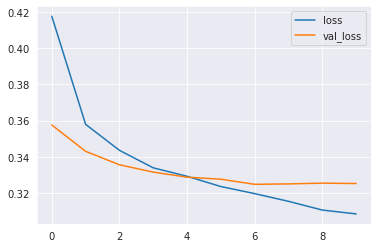

In [369]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [370]:
from sklearn.metrics import classification_report,confusion_matrix

In [371]:
predictions = model.predict_classes(X_test)

In [372]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[12325   741]
 [ 1667  2193]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     13066
           1       0.75      0.57      0.65      3860

    accuracy                           0.86     16926
   macro avg       0.81      0.76      0.78     16926
weighted avg       0.85      0.86      0.85     16926

